Load Dataset

In [7]:
import pandas as pd

df = pd.read_csv("student_data.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
# Fill numeric missing values only
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing values with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])



In [10]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [24]:
df['Pass'] = df['G3'] >= 10
df['Pass'] = df['Pass'].astype(int)

X = df.drop(columns=['Pass'])
y = df['Pass']


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


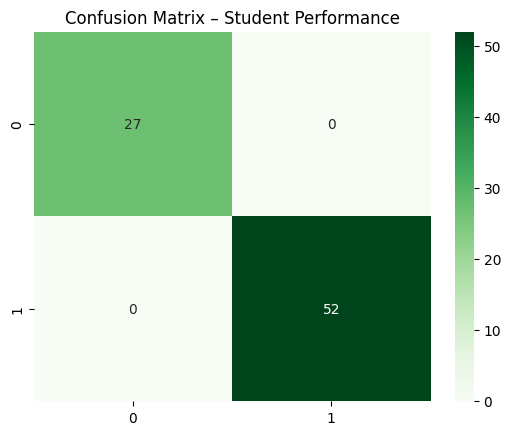

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Student Performance")
plt.show()


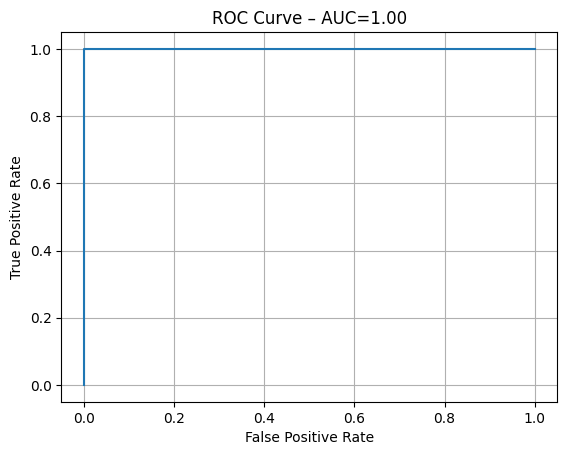

AUC Score: 1.0


In [35]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.title(f"ROC Curve – AUC={roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

print("AUC Score:", roc_auc)


In [36]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("CV Scores:", cv)
print("Mean CV Accuracy:", cv.mean())


CV Scores: [0.97468354 1.         0.98734177 1.         1.        ]
Mean CV Accuracy: 0.9924050632911392


In [37]:
for c in [0.01, 0.1, 1, 10]:
    m = LogisticRegression(C=c, max_iter=200)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    print(f"C={c}  Accuracy={accuracy_score(y_test, pred):.3f}")


C=0.01  Accuracy=0.949
C=0.1  Accuracy=0.987
C=1  Accuracy=1.000
C=10  Accuracy=1.000


C:\Users\Fathima Suha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
